In [45]:
matchId= '12007508'

In [46]:
import requests

params = {
    'matchId': matchId,
}

response = requests.get('https://www.sofascore.com/api/v1/event/' +matchId +'/average-positions', params)

In [47]:
data = response.json()

In [48]:
hcolor1='Red'
hcolor2='Yellow'

acolor1='Maroon'
acolor2= 'Green'

In [49]:
Home_data=[]
Away_data=[]
Subs_data=[]

In [50]:
def extract_player_data(team):
    for player_info in data[team]:
        player = player_info["player"]
        if team=='home':
            Home_data.append({
                "name": player.get("name"),
                "jerseyNumber": player.get("jerseyNumber"),
                "averageX": player_info.get("averageX"),
                "averageY": player_info.get("averageY")
            })
        elif team=='away':
            Away_data.append({
                "name": player.get("name"),
                "jerseyNumber": player.get("jerseyNumber"),
                "averageX": player_info.get("averageX"),
                "averageY": player_info.get("averageY")
            })

extract_player_data("home")
extract_player_data("away")

In [51]:
def extract_subs_data(team):
    for player_info in data[team]:
        player = player_info["playerIn"]
        Subs_data.append({
                "name": player.get("name")
            })
extract_subs_data("substitutions")

In [52]:
import pandas as pd

In [53]:
df_home= pd.DataFrame(Home_data)
df_away= pd.DataFrame(Away_data)
df_subs= pd.DataFrame(Subs_data)

In [54]:
df_home.head(15)

,name,jerseyNumber,averageX,averageY
0,Prabhsukhan Gill,13,9.288889,50.081481
1,Chungnunga Lal,5,40.069565,11.369565
2,Ajay Chhetri,6,36.323810,70.700000
3,Souvik Chakraborty,23,43.716327,44.424490
4,Cleiton Silva,10,61.398077,61.307692
5,Naorem Mahesh Singh,29,52.722222,40.801111
6,Sayan Banerjee,84,59.915909,9.543182
7,Vishnu PV,82,71.225581,22.839535
8,Harmanjot Singh Khabra,7,34.133333,65.816667
9,Nandhakumar Sekar,11,59.518000,56.476000


In [55]:
df_away.head(15)

,name,jerseyNumber,averageX,averageY
0,Armando Sadiku,None,73.792857,53.907143
1,Ashish Rai,44,33.804545,16.295455
2,Vishal Kaith,1,7.623333,49.216667
3,Liston Colaco,17,57.036735,80.812245
4,Jason Cummings,35,67.921053,36.468421
5,Hector Yuste,None,29.959459,48.843243
6,Joni Kauko,None,50.917460,45.817460
7,Anirudh Thapa,7,43.004762,46.671429
8,Sahal Abdul Samad,18,51.396875,43.545313
9,Anwar Ali,4,37.172131,23.216393


In [56]:
df_subs.head()

,name
0,Vishnu PV
1,Sayan Banerjee
2,Ashish Rai
3,Anirudh Thapa
4,Armando Sadiku


In [57]:
df_home

,name,jerseyNumber,averageX,averageY
0,Prabhsukhan Gill,13,9.288889,50.081481
1,Chungnunga Lal,5,40.069565,11.369565
2,Ajay Chhetri,6,36.323810,70.700000
3,Souvik Chakraborty,23,43.716327,44.424490
4,Cleiton Silva,10,61.398077,61.307692
5,Naorem Mahesh Singh,29,52.722222,40.801111
6,Sayan Banerjee,84,59.915909,9.543182
7,Vishnu PV,82,71.225581,22.839535
8,Harmanjot Singh Khabra,7,34.133333,65.816667
9,Nandhakumar Sekar,11,59.518000,56.476000


In [58]:
from mplsoccer import Pitch, VerticalPitch
import matplotlib.pyplot as plt

In [59]:
df_home['substituted'] = df_home['name'].isin(df_subs['name'])
df_away['substituted'] = df_away['name'].isin(df_subs['name'])

In [60]:
df_home

,name,jerseyNumber,averageX,averageY,substituted
0,Prabhsukhan Gill,13,9.288889,50.081481,False
1,Chungnunga Lal,5,40.069565,11.369565,False
2,Ajay Chhetri,6,36.323810,70.700000,False
3,Souvik Chakraborty,23,43.716327,44.424490,False
4,Cleiton Silva,10,61.398077,61.307692,False
5,Naorem Mahesh Singh,29,52.722222,40.801111,False
6,Sayan Banerjee,84,59.915909,9.543182,True
7,Vishnu PV,82,71.225581,22.839535,True
8,Harmanjot Singh Khabra,7,34.133333,65.816667,True
9,Nandhakumar Sekar,11,59.518000,56.476000,False


In [61]:
df_away

,name,jerseyNumber,averageX,averageY,substituted
0,Armando Sadiku,None,73.792857,53.907143,True
1,Ashish Rai,44,33.804545,16.295455,True
2,Vishal Kaith,1,7.623333,49.216667,False
3,Liston Colaco,17,57.036735,80.812245,False
4,Jason Cummings,35,67.921053,36.468421,False
5,Hector Yuste,None,29.959459,48.843243,False
6,Joni Kauko,None,50.917460,45.817460,False
7,Anirudh Thapa,7,43.004762,46.671429,True
8,Sahal Abdul Samad,18,51.396875,43.545313,False
9,Anwar Ali,4,37.172131,23.216393,False


In [62]:
df_home_subs= df_home[df_home['substituted'] == True]
df_home=df_home[df_home['substituted'] == False]

df_away_subs= df_away[df_away['substituted'] == True]
df_away=df_away[df_away['substituted'] == False]

In [63]:
df_away_subs

,name,jerseyNumber,averageX,averageY,substituted
0,Armando Sadiku,None,73.792857,53.907143,True
1,Ashish Rai,44,33.804545,16.295455,True
7,Anirudh Thapa,7,43.004762,46.671429,True


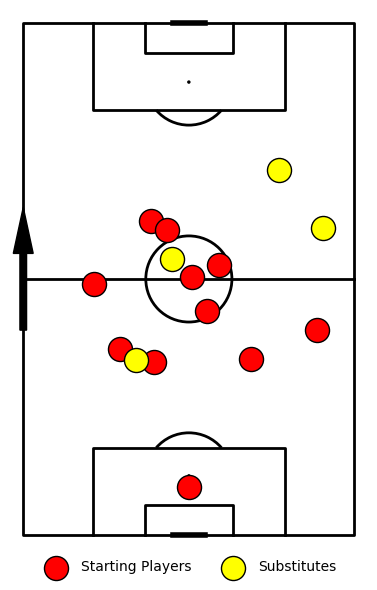

In [64]:
pitch = VerticalPitch(pitch_type='opta',half=False, pitch_color='white', line_color='black')
fig, ax = pitch.draw(figsize=(10, 6))
plt.arrow(100, 40,0,15, width = 2, facecolor= 'black', edgecolor='black')
scatter= pitch.scatter(df_home.averageX, df_home.averageY,s= 300, ax=ax, edgecolor='black', facecolor=hcolor1, label= 'Starting Players')
scatter= pitch.scatter(df_home_subs.averageX, df_home_subs.averageY,s= 300, ax=ax, edgecolor='black', facecolor=hcolor2, label= 'Substitutes')


# Adding legend below the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0), frameon= False, ncol=2)

plt.savefig('Home Positions.png', bbox_inches='tight')
plt.show()

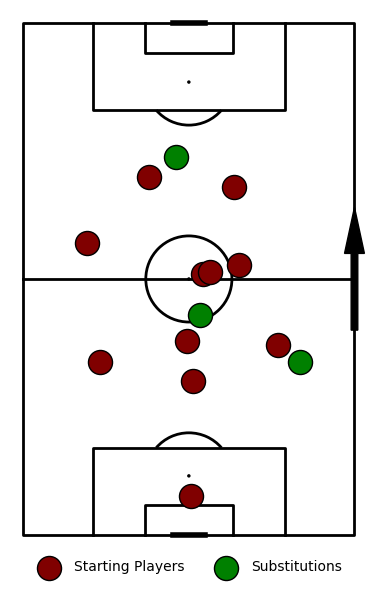

In [65]:
pitch = VerticalPitch(pitch_type='opta',half=False, pitch_color='white', line_color='black')
fig, ax = pitch.draw(figsize=(10, 6))
plt.arrow(0, 40,0,15, width = 2, facecolor= 'black', edgecolor='black')
scatter= pitch.scatter(df_away.averageX, df_away.averageY,s= 300, ax=ax, edgecolor='black', facecolor=acolor1, label= 'Starting Players')
scatter= pitch.scatter(df_away_subs.averageX, df_away_subs.averageY,s= 300, ax=ax, edgecolor='black', facecolor=acolor2, label= 'Substitutions')

# Adding legend below the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0), frameon= False, ncol=2)

plt.savefig('Away Positions.png',bbox_inches='tight')
plt.show()